In [28]:
import pandas as pd
import pm4py

In [29]:
df = pm4py.format_dataframe(pd.read_csv('processmining.csv', sep=','),
                             case_id='ProcessId',
                             activity_key='Workstation',
                             timestamp_key='Start')

df["Workstation"] = df["Workstation"].astype("string")
df.dtypes

id                                 int64
ProcessId                          int64
Workstation               string[python]
Start                datetime64[ns, UTC]
case:concept:name         string[python]
concept:name              string[python]
time:timestamp       datetime64[ns, UTC]
@@index                            int64
@@case_index                       int64
dtype: object

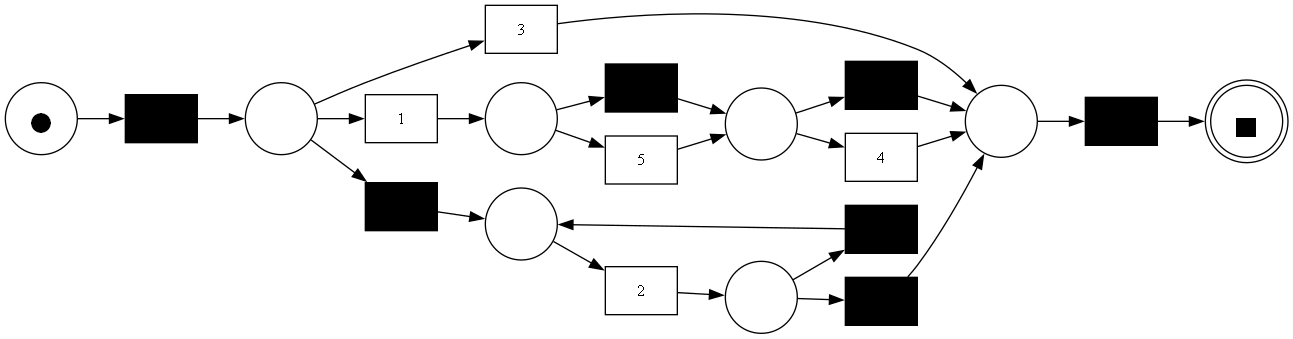

In [36]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [30]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

KeyError: '3'

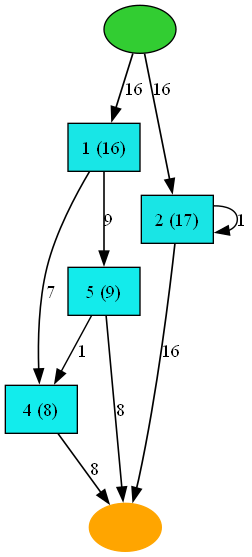

In [19]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

# Conformance checking

In [37]:
pd.read_csv("output_plan.csv").head()

,id,ProcessId,RoundId,Workstation,Start,End,ProcessDurationInSeconds,Type,ProductionStart,ProductionEnd,ProductionDurationInSeconds
0,1,2178,243,1,2025-08-29 16:14:04,2025-08-29 16:14:41,37.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
1,2,2178,243,4,2025-08-29 16:14:55,2025-08-29 16:18:42,227.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
2,3,2179,243,1,2025-08-29 16:15:04,2025-08-29 16:14:41,37.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
3,4,2179,243,5,2025-08-29 16:15:55,2025-08-29 16:18:42,227.0,6.0,2025-08-29 16:13:55,2025-08-29 16:18:52,297.0
4,5,2176,243,3,2025-08-29 16:15:54,2025-08-29 16:17:03,69.0,NaN,NaN,NaN,NaN


In [38]:
df_plan = pm4py.format_dataframe(pd.read_csv('output_plan.csv', sep=','),
                             case_id='ProcessId',
                             activity_key='Workstation',
                             timestamp_key='Start')

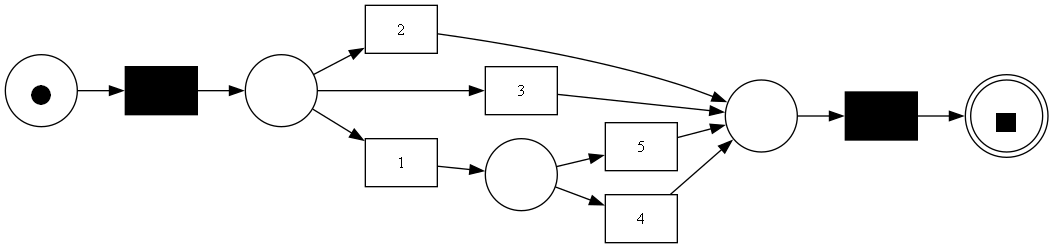

In [39]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(df_plan)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [40]:
pm4py.fitness_token_based_replay(df, net, initial_marking, final_marking)

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1049.98it/s]


{'perc_fit_traces': 95.83333333333333,
 'average_trace_fitness': 0.9923611111111111,
 'log_fitness': 0.9904761904761905,
 'percentage_of_fitting_traces': 95.83333333333333}

average trace fitness - 85%